In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
import time
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.metrics import classification_report , confusion_matrix ,f1_score,accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier , RandomForestClassifier , StackingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import RFE
import scipy.stats as stats
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [57]:
raw_df = pd.read_csv('census1.csv')

In [58]:
df = raw_df.copy()

In [59]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [60]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Our Data has:

6 integer variables
9 object variables

In [62]:
df.shape

(32560, 15)

#Statistical Exploration
Get descriptive statistics for the numeric variables

In [63]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [64]:
df.isnull().sum()  # Will show you null count for each column, but will not count Zeros(0) as null

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We can see that no missing values exist in dataset, that's great!

In [66]:
cateogry_columns=df.select_dtypes(include=['object']).columns.tolist()
integer_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df:
    if df[column].isnull().any():
        if(column in cateogry_columns):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].mean)

In [67]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [68]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [69]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [70]:
df['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: Capital_gain, Length: 119, dtype: int64

# Replace ? with mode values

In [71]:
df['Workclass']=df['Workclass'].str.replace('?','Private',regex=True)
df['Occupation']=df['Occupation'].str.replace('?','Prof-specialty',regex=True)
df['Native_country']=df['Native_country'].str.replace('?','United-States',regex=True)


In [72]:
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# EDA

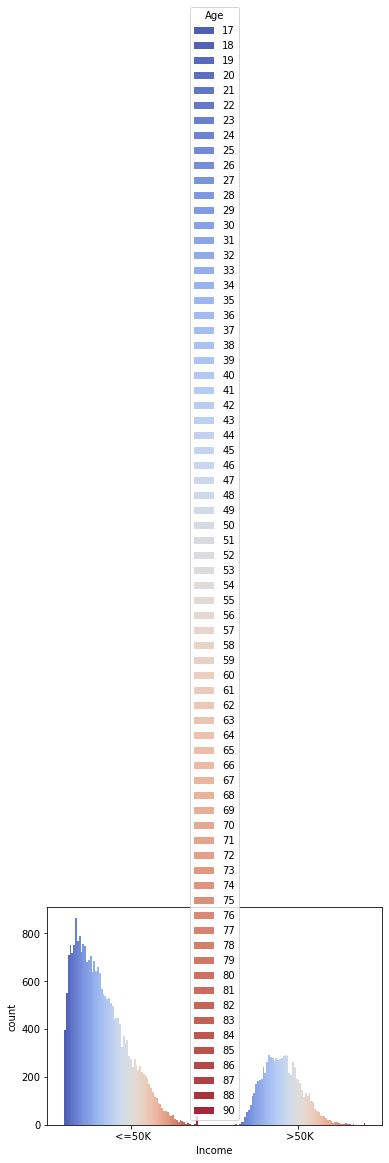

In [34]:
sns.countplot(df['Income'], palette='coolwarm', hue='Age', data=df);

<AxesSubplot:xlabel='Age', ylabel='Density'>

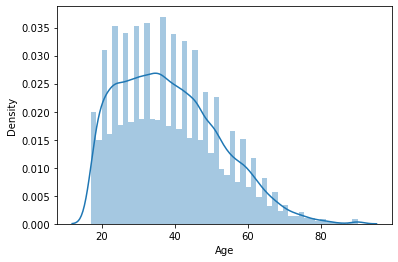

In [35]:
sns.distplot(df.Age)

We observe that our data is has right skewness, with majority of the ages falling in the 20–50. The count keeps on decreasing as the age increases.

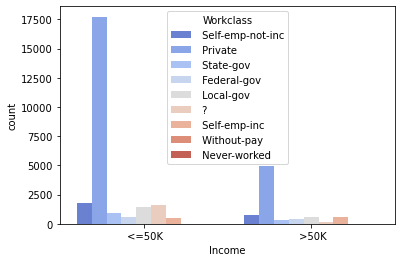

In [37]:
sns.countplot(df['Income'], palette='coolwarm', hue='Workclass', data=df);

Most of the Private working person has more income.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' ?'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

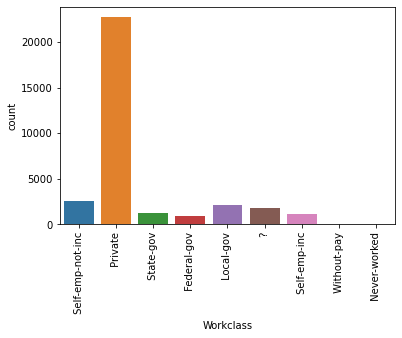

In [59]:
ax=sns.countplot(x="Workclass",data=df)
plt.xticks(rotation=90)

We observe that majority of the people belong to ‘Private’ sector workclass.

In [ ]:
sns.countplot(df['Income'], palette='coolwarm', hue='Fnlwgt', data=df);

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

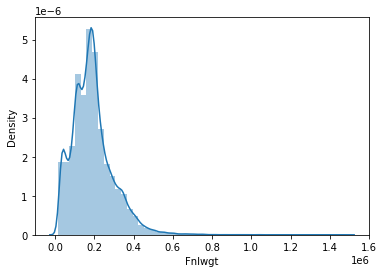

In [41]:
sns.distplot(df.Fnlwgt)

The data is Left skewed. 

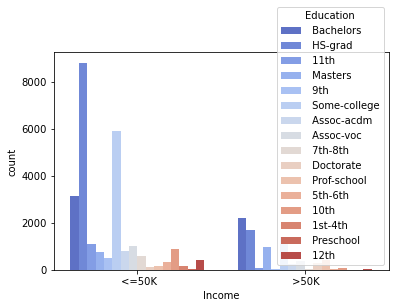

In [43]:
sns.countplot(df['Income'], palette='coolwarm', hue='Education', data=df);

Most of the Persons are HS-grad or collage. 

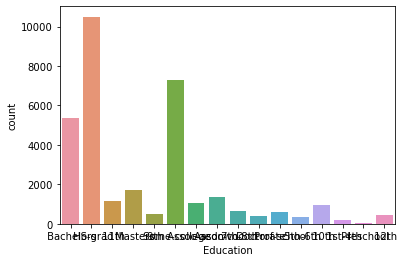

In [44]:
ax=sns.countplot(x="Education",data=df)
plt.show()

We observe no missing values in this column, and also find out that majority of the people have education level as ‘HS-grad’, followed by ‘Some-college’ and ‘Bachelors’.

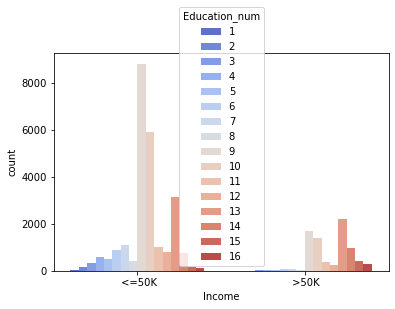

In [45]:
sns.countplot(df['Income'], palette='coolwarm', hue='Education_num', data=df);

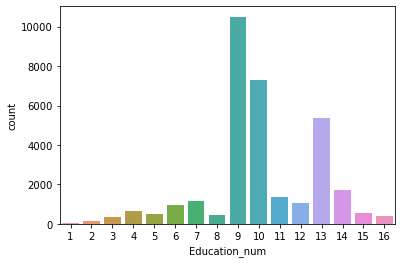

In [46]:
ax=sns.countplot(x="Education_num",data=df)
plt.show()

we observe that the count of ‘Education’ column and ‘Education_num’ is exactly same! Which means, the ‘Education_num’ column is providing same information as ‘Education’ column, but in a numeric manner.

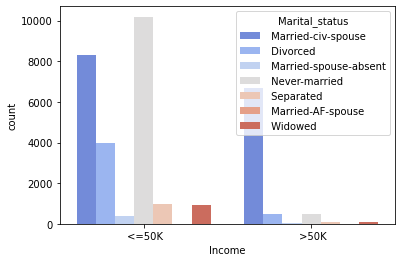

In [47]:
sns.countplot(df['Income'], palette='coolwarm', hue='Marital_status', data=df);

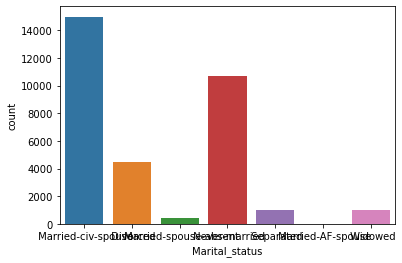

In [48]:
ax=sns.countplot(x="Marital_status",data=df)
plt.show()

Majority of the people have ‘Marital_Status’ as ‘Married-civ-spouse’, and least have ‘Married-AF-spouse’.
Count of ‘Never-married’ is also quite high.

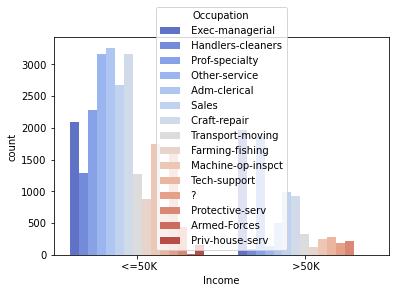

In [49]:
sns.countplot(df['Income'], palette='coolwarm', hue='Occupation', data=df);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

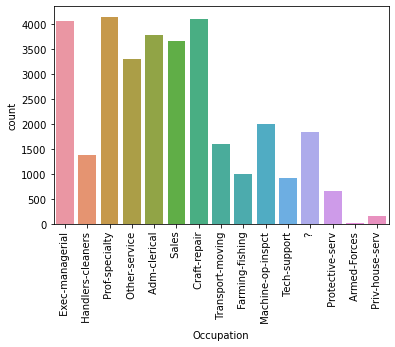

In [51]:
ax=sns.countplot(x="Occupation",data=df)
plt.xticks(rotation=90)

The occupation column contains 15 different categories.

In [ ]:
sns.countplot(df['Income'], palette='coolwarm', hue='Occupation', data=df);

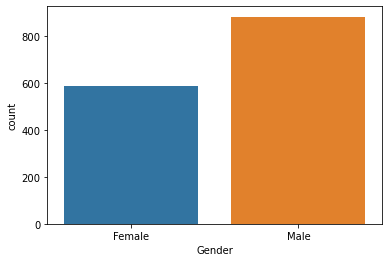

In [29]:
ax=sns.countplot(x="Occupation",data=df)
plt.show()

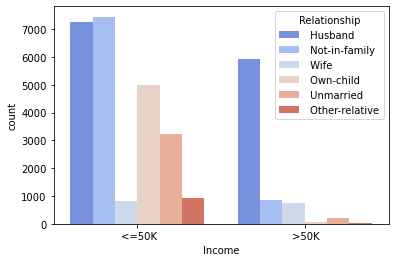

In [89]:
sns.countplot(df['Income'], palette='coolwarm', hue='Relationship', data=df);

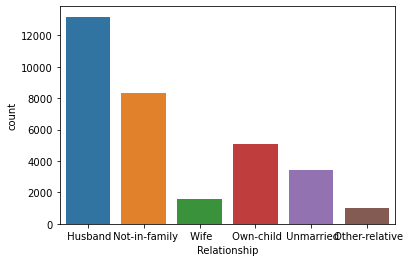

In [90]:
ax=sns.countplot(x="Relationship",data=df)
plt.show()

The highest Relationship is Husband.

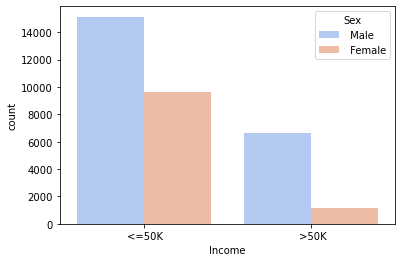

In [91]:
sns.countplot(df['Income'], palette='coolwarm', hue='Sex', data=df);

In [ ]:
ax=sns.countplot(x="Sex",data=df)
plt.show()

Male employee are more than Female employee.

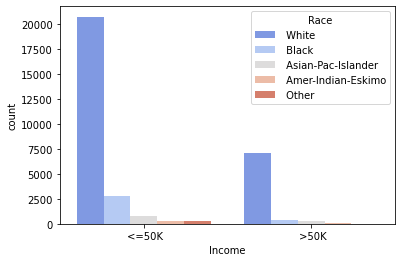

In [93]:
sns.countplot(df['Income'], palette='coolwarm', hue='Race', data=df);

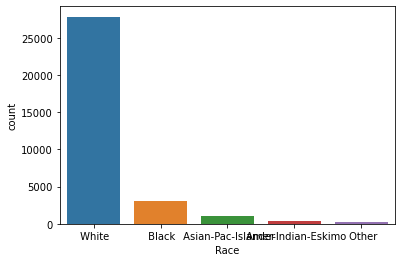

In [94]:
ax=sns.countplot(x="Race",data=df)
plt.show()

Most of them is White.

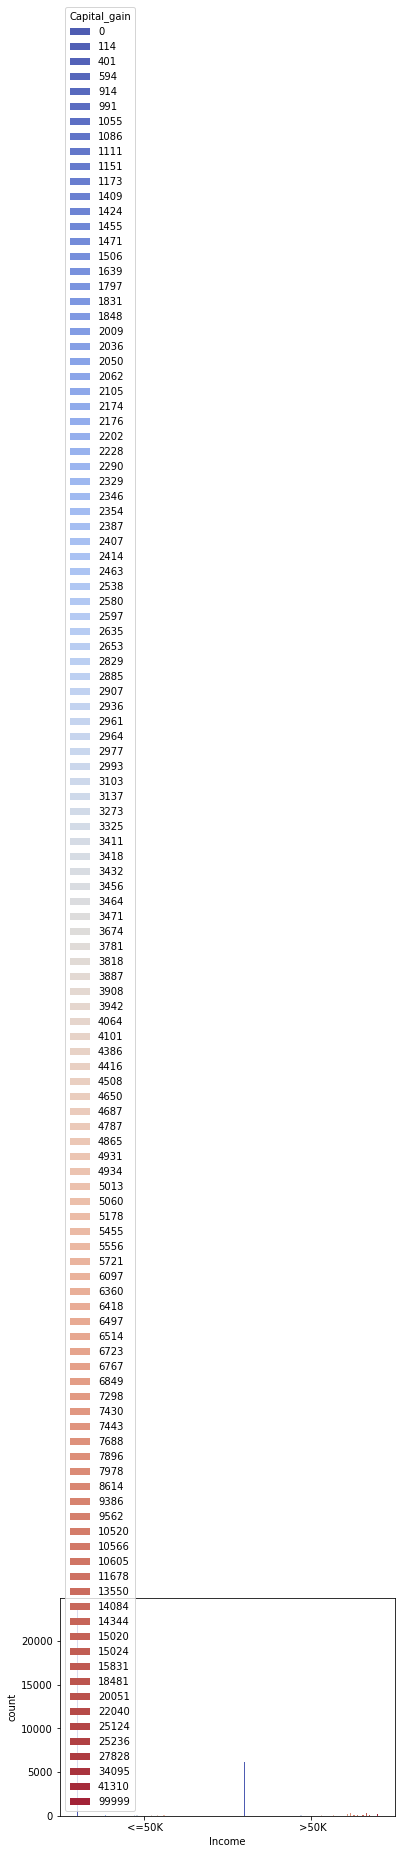

In [95]:
sns.countplot(df['Income'], palette='coolwarm', hue='Capital_gain', data=df);

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

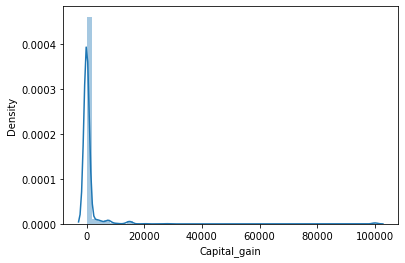

In [98]:
sns.distplot(df.Capital_gain)

Most of the data is 0 the data is left skewed.

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

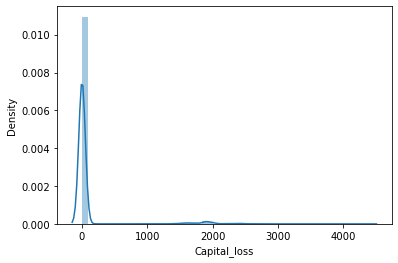

In [99]:
sns.distplot(df.Capital_loss)

Most of the data is 0 and the data is left skewed.

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

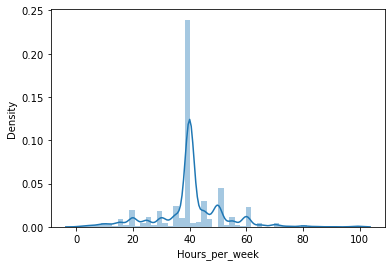

In [101]:
sns.distplot(df.Hours_per_week)

The range of Hours per week is between 20 to 60.

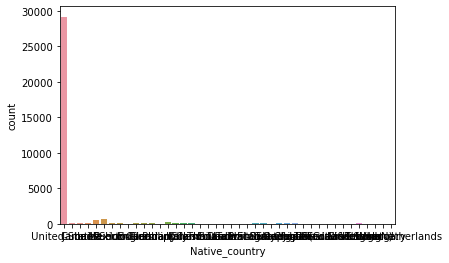

In [104]:
ax=sns.countplot(x="Native_country",data=df)
plt.show()

Looking at the graphs above, we make the following conclusions –
1. A person has high chance of earning >50K in case his/her race is ‘White’/’Asian-pac-islander’.
2. Males have a higher chance of earning more than 50K, than females.
3. Ratio of people earning more than 50K is higher in case Workclass is ‘Self-emp-inc’.
4. People with education level as ‘Masters/Doctorate/Prof-school’ have higher ratios of >50K earning, than <=50K. Bachelors degree also has around 10:7 ratio of <=50K : >50K.
5. If the relationship in family is either ‘Husband/Wife’, the chances of earning more than 50K is high.
6. From the scatterplot between age, hours_per_week and income, we observe that a person needs to be >30 to be earning more than 50K, else needs to work at least 60 hours_per_week to earn >50K.

# LabelEncoder

In [73]:
le=LabelEncoder()
df['Workclass'] = le.fit_transform(df['Workclass'])
df['Education'] = le.fit_transform(df['Education'])
df['Marital_status'] = le.fit_transform(df['Marital_status'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Relationship'] = le.fit_transform(df['Relationship'])
df['Race'] = le.fit_transform(df['Race'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Native_country'] = le.fit_transform(df['Native_country'])
df['Income'] = le.fit_transform(df['Income'])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


By this we convert all the catagorical data into numeric data.

# Skewness

In [74]:
df.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
Income             1.212383
dtype: float64

The concerning Variables are:

Fnlwgt,Capital_gain,Capital_loss,Race,Native_country

In [75]:
skew=('Fnlwgt','Capital_gain','Capital_loss','Race','Native_country')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [76]:
df.skew()

Age               0.558738
Workclass         0.076178
Fnlwgt           -0.842559
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.000536
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      3.096803
Capital_loss      4.307460
Hours_per_week    0.227636
Native_country   -4.243083
Income            1.212383
dtype: float64

We further proceed to next steps since the skewness does not get further decreased.

# OUTLIERS

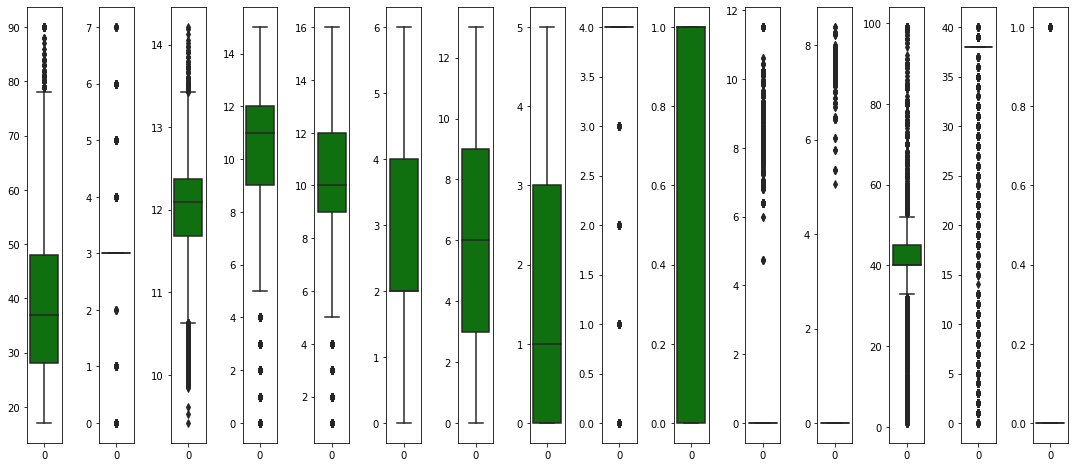

In [77]:
import seaborn as sns
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= df[collist[i]],color='green',orient='v')
    plt.tight_layout()

we can clear see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.

So now we detect the outliers now the second step is to remove the outliers, there are different way to remove the outliers that are find the IQR, zscore values

In [78]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(32560, 15)

In [82]:
threshold=3
z1=(np.where(z>3))

In [80]:
len(np.where(z>3)[0])

7044

After calculating the number of rows containing outliers, we find that we would lose 7044 rows taking a threshold value of zscore as 3. Since our dataset is already imbalanced, losing this number of rows with further increase the imbalance, and would be a significant loss if we consider the rows with income higher than 50K.
Hence, we keep the rows and proceed with the next steps.

# CORRELATION

<AxesSubplot:>

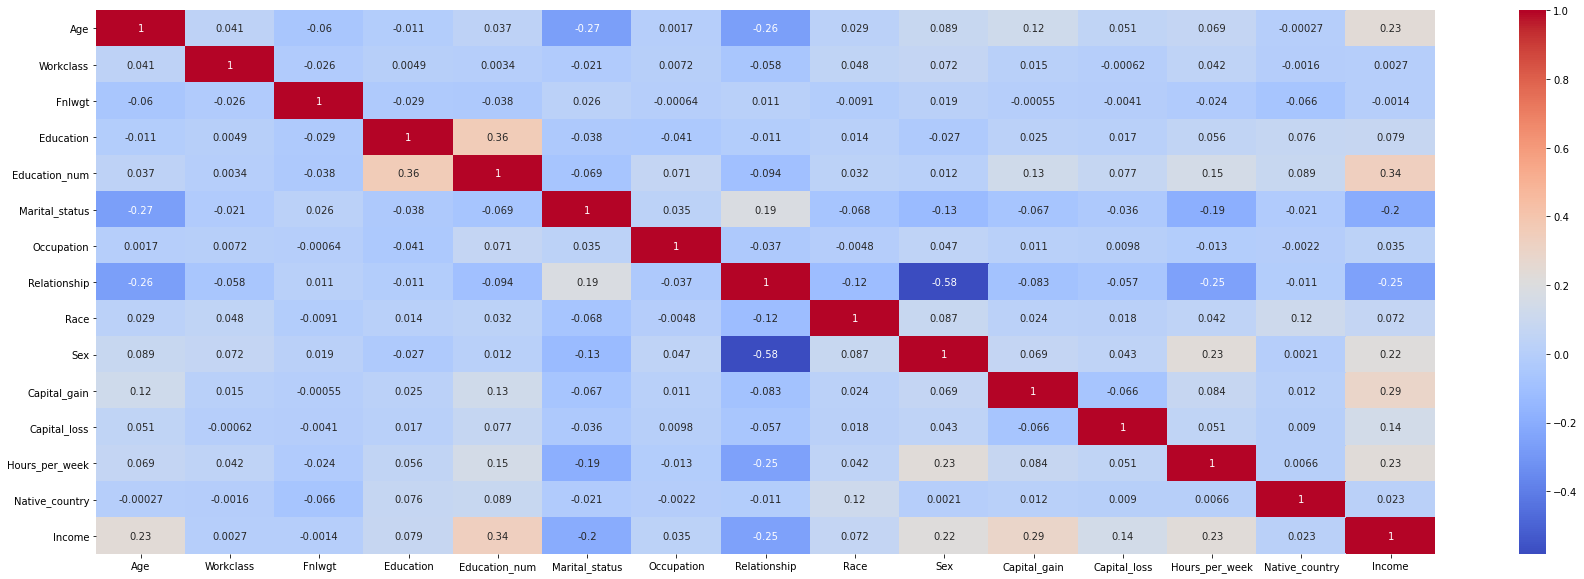

In [85]:
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

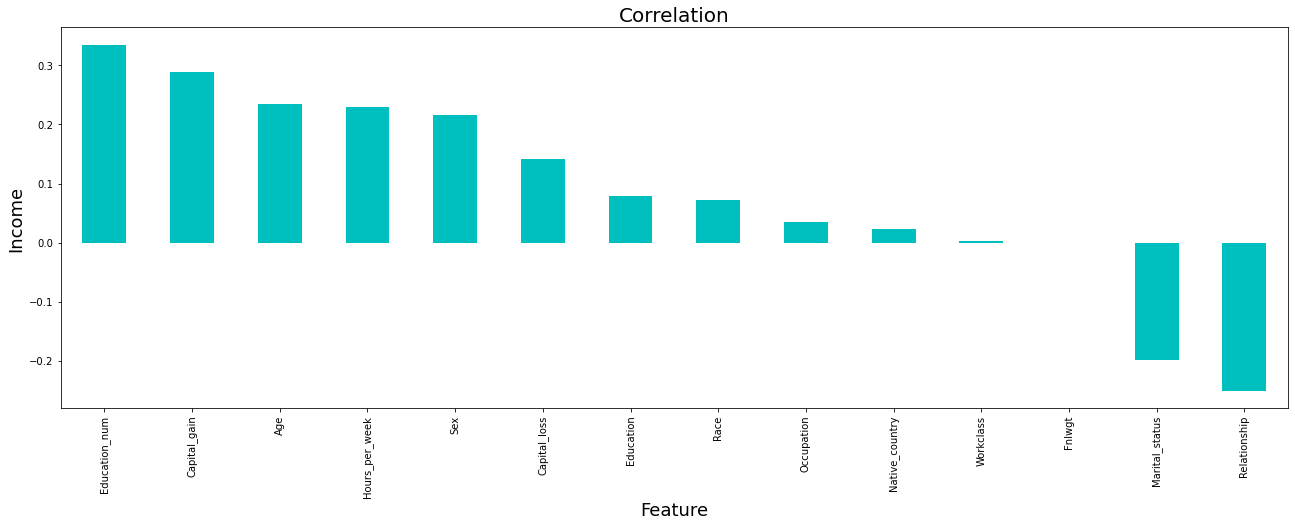

In [87]:
plt.figure(figsize=(22,7))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Income',fontsize=18)
plt.title('Correlation',fontsize=20)
plt.show()

Income column is highly correlated with Education_num and less correlated with Relationship.

In [88]:
x = df.drop(columns = ['Income'],axis=1)
y = df['Income']

# Scalling the data using Min-Max Scaler

In [89]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [90]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
maxAcc=0
MaxRs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        MaxRs=i
print("Best Accuracy is",maxAcc,"on random state", MaxRs)
    

Best Accuracy is 0.8217775709632387 on random state 56


We saw that we get 82% accuracy at random state 56

In [92]:
def models(x_train, y_train):
    from sklearn.linear_model import LogisticRegression

    log = LogisticRegression(random_state = 56)
    log.fit(x_train, y_train)

    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p =2)
    knn.fit(x_train, y_train)

    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 56)
    svc_lin.fit(x_train, y_train)

    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 56)
    svc_rbf.fit(x_train, y_train)

    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(x_train, y_train)

    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state =56 )
    tree.fit(x_train,y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=56)
    forest.fit(x_train,y_train)

    print('[0]Logistic Regression Training Accuracy:', log.score(x_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(x_train, y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(x_train, y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(x_train, y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(x_train, y_train))
    print('[5]Decision Tree Classsifier Training Accuracy:', tree.score(x_train, y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(x_train, y_train))

    return log, knn, svc_lin, svc_rbf, gauss, tree, forest


In [93]:
model = models(x_train,y_train)

[0]Logistic Regression Training Accuracy: 0.8148980059592024
[1]K Nearest Neighbor Training Accuracy: 0.8653678661471464
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.8118725647490259
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.818794407517763
[4]Gaussian Naive Bayes Training Accuracy: 0.8095805638322255
[5]Decision Tree Classsifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9869355947742379


# Confusion Matrix

In [94]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(x_test))
    
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i, (TP + TN) / (TP + TN + FN +FP)))
    cr=classification_report(y_test,model[i].predict(x_test))
    print(cr)
    print('\n')

[[7598  531]
 [1495 1121]]
Model[0] Testing Accuracy = "0.811447184737087 !"
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      8129
           1       0.68      0.43      0.53      2616

    accuracy                           0.81     10745
   macro avg       0.76      0.68      0.70     10745
weighted avg       0.80      0.81      0.80     10745



[[7173  956]
 [1148 1468]]
Model[1] Testing Accuracy = "0.8041879944160074 !"
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      8129
           1       0.61      0.56      0.58      2616

    accuracy                           0.80     10745
   macro avg       0.73      0.72      0.73     10745
weighted avg       0.80      0.80      0.80     10745



[[7768  361]
 [1705  911]]
Model[2] Testing Accuracy = "0.8077245230339692 !"
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      8129


# Cross Validation

In [95]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x,y,cv=5)
print("cross validation score of LR is:",scr.mean())

cross validation score of LR is: 0.8132371007371008


In [96]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
scr=cross_val_score(rf,x,y,cv=5)
print("cross validation score of Random Forest Classifier is:",scr.mean())

cross validation score of Random Forest Classifier is: 0.856418918918919


In [97]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
scr=cross_val_score(dt,x,y,cv=5)
print("cross validation score of Decision Tree Classifieris:",scr.mean())

cross validation score of Decision Tree Classifieris: 0.8085073710073709


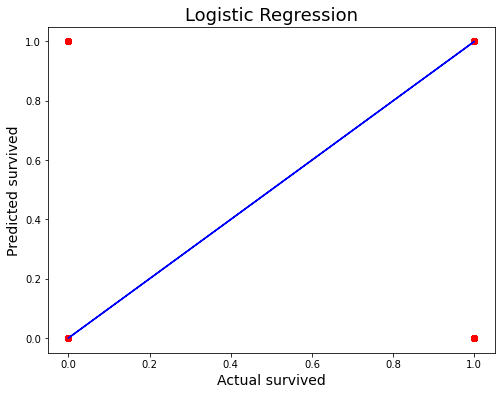

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predrf,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual survived',fontsize=14)
plt.ylabel('Predicted survived',fontsize=14)
plt.title('Logistic Regression',fontsize=18)
plt.show()

# Hyper Tunning Parameter

In [102]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [103]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}

In [104]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8514657980456026

# AUC-ROC Curve

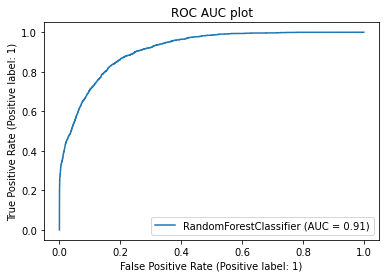

In [105]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

# Conclusion

In [106]:
import pickle
filename='Census.pkl'
pickle.dump(GCV.best_estimator_,open(filename,'wb'))

In [107]:
import pickle
loaded_model=pickle.load(open('Census.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

85.14657980456026


In [108]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],GCV_pred[:]],index=["Predicted","original"])

In [109]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,10735,10736,10737,10738,10739,10740,10741,10742,10743,10744
Predicted,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
original,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0


# After training or testing the model with different Classifier. Almost all models are giving accuracy above 80%. But the Highest accuracy is given by RandomForest Classifier That is 85%. And we do Cross validation the Model gives 85% score for cross validation. AUC curve is also giving 91% . 